상관계수 (r): -0.1185
P-value: 0.5727


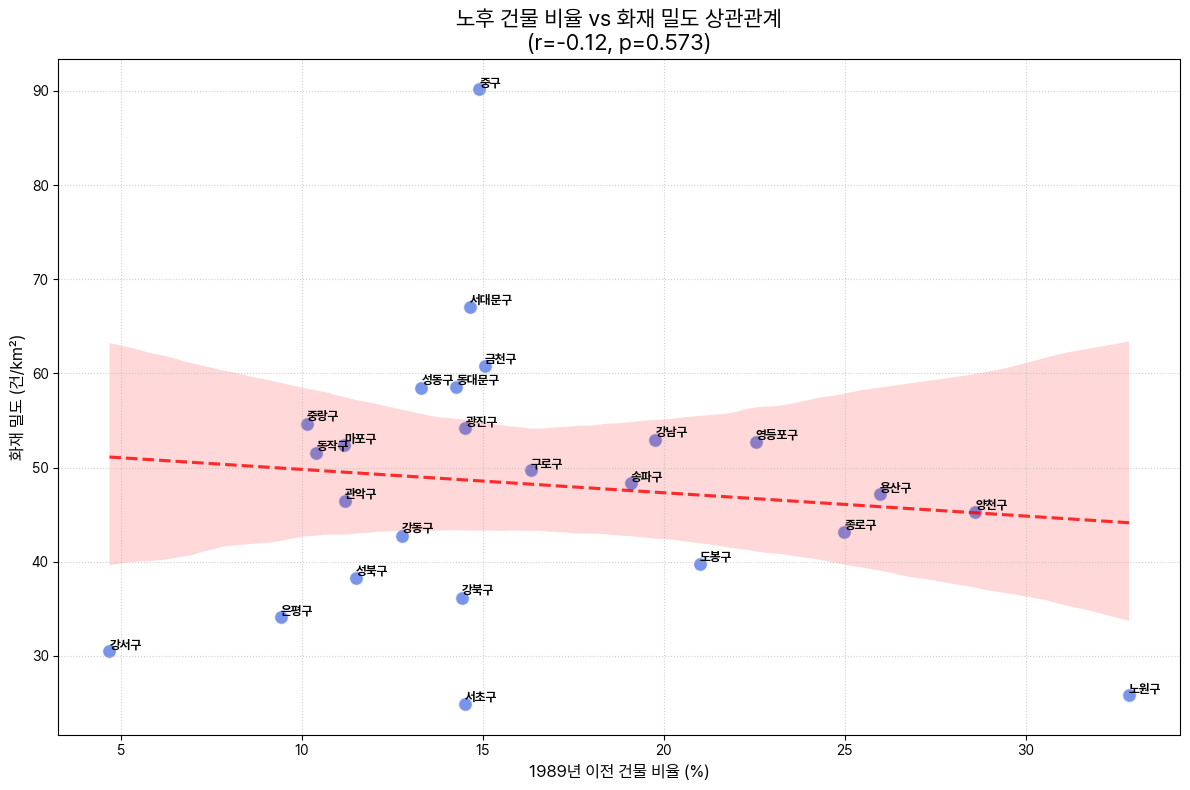

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows 환경에 맞게 수정 가능)
plt.rc('font', family='Pretendard') 
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 로드
# 사용자가 업로드한 화재 밀도 데이터와 건물 데이터 로드
df_fire_density = pd.read_csv('./filtered_data/fire_densitity.csv')
df_building = pd.read_csv('./filtered_data/building_year_by_gu.csv')

# 2. 데이터 전처리
# 건물 데이터의 '구' 컬럼을 '자치구'로 변경하여 병합 키 통일
df_building = df_building.rename(columns={'구': '자치구'})

# 두 데이터프레임 병합 (inner join)
df_merged = pd.merge(df_fire_density, df_building, on='자치구')

# 분석 변수 설정
x_col = '1989년이전비율(%)'
y_col = '화재밀도'  # (건/km²)

# 3. 통계 분석 (피어슨 상관계수)
corr, p_val = stats.pearsonr(df_merged[x_col], df_merged[y_col])

print(f"상관계수 (r): {corr:.4f}")
print(f"P-value: {p_val:.4f}")

# 4. 시각화
plt.figure(figsize=(12, 8), dpi=300)

# (1) 산점도 및 추세선
sns.regplot(
    x=x_col, 
    y=y_col, 
    data=df_merged, 
    color='royalblue',  # 파란색 계열
    scatter_kws={'s': 100, 'alpha': 0.7, 'edgecolor': 'white'},
    line_kws={'linestyle': '--', 'color': 'red', 'alpha': 0.8}
)

# (2) 자치구 이름 라벨링
for i, row in df_merged.iterrows():
    plt.text(
        x=row[x_col], 
        y=row[y_col], 
        s=row['자치구'], 
        fontsize=9,
        fontweight='bold',
        horizontalalignment='left',
        verticalalignment='bottom'
    )

plt.title(f'노후 건물 비율 vs 화재 밀도 상관관계\n(r={corr:.2f}, p={p_val:.3f})', fontsize=16)
plt.xlabel('1989년 이전 건물 비율 (%)', fontsize=12)
plt.ylabel('화재 밀도 (건/km²)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.savefig('./imgs/1989vsfire.png')
plt.show()